<a href="https://colab.research.google.com/github/AEW2015/fpga-colab/blob/main/xqrku060_FMECA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

AMD-Xilinx offers a Radiaiton Tolerant KU060 FPGA, but how often these devices fail and what is the effect of mitigation?


<figure>
    <img src="https://cf-images.us-east-1.prod.boltdns.net/v1/static/17209957001/321ccd1b-67b4-452a-a0a9-fc5586fdb87c/a3403ace-0540-42cc-a7e6-e042e5a7beb1/1280x720/match/image.jpg"
    width="450"
    alt="FT KU060">
    <figcaption>Caption Goes Here</figcaption>
</figure>

TODO:
* ~~add pictures~~
    * Add Placement Picture
* ~~point to publications~~
* ~~point to other examples~~
* Have a small story between sections


Quick points:
*   Using Public Vendor Heavy Ion Data
*   Vendor, Public, and Opensource Tools and designs
*   Map data to an orbit for failures for a specific designs



Assumptions will be listed, but can be changed to match your situation:
*   DS882 Weibull Fit Curves, and SEFI rates
*   Spenvis with listed configs
*   GEO orbit
*   100 mills of aluminum shiledling
*   Simple CRAM Scrubbing (only look at Single CRAM events)
*   No data for freqnecy-based SETI upsets
*   Other assumptions listed below



# Orbit Upset Rates

![Spenvis logo](https://www.spenvis.oma.be/images/spenvislogo.gif)

Spenvis Config:
1.  Orbit is geostionary, 1 day orbit, longitude 0, Jan 2020 Launch
2.  Solar Partiacl Fluex CREMA-96, H to U, Wort Week, Mag Shield (quiet)
3. Short-Term SEU rate, 0.254 cm Shield, Si (CREME-86), x*y = 0.0004 um, z = 2 um
4. Heavy Ion Weibull Funciton



In [1]:
CRAM_bit_day    = 5.5132E-09
BRAM_bit_day    = 7.8714E-09
SLR_device_day  = 1.1775E-03
CNT_device_day  = 7.6083E-04
DSP_device_day  = 1.3997E-03
GTH_device_day  = 9.0687E-05
IOB_device_day  = 1.9342E-03
PLL_device_day  = 4.9828E-05
MMCM_device_day = 4.9828E-05
SEFI_device_day = 4.5e-4

# Device Failures

<figure>
    <img src="https://www.xilinx.com/content/xilinx/en/products/silicon-devices/fpga/rt-kintex-ultrascale/_jcr_content/root/imageTabParsys/childParsys-productAdvantages/xilinxcolumns/childParsys-1/xilinximage.img.png/1684954227147.png"
    width="350"
    alt="FPGA Layout">
    <figcaption>Caption Goes Here</figcaption>
</figure>

Apply this to the Whole device:

*   Full Bitstream is 192,999,264 bits:
  * CRAM is 153186144 bits (type 0 frames)
  * BRAM is 39813120 bits (type 1 frames)



In [2]:
CRAM_device_day = CRAM_bit_day * 153186144
BRAM_device_day = BRAM_bit_day * 39813120

In [3]:
Full_device_day = CRAM_device_day + BRAM_device_day + SLR_device_day + CNT_device_day + DSP_device_day \
                + GTH_device_day + IOB_device_day + PLL_device_day + MMCM_device_day + SEFI_device_day
print("FPGA will see a device failure every {0:0.4} hours".format(24/Full_device_day))

FPGA will see a device failure every 20.62 hours


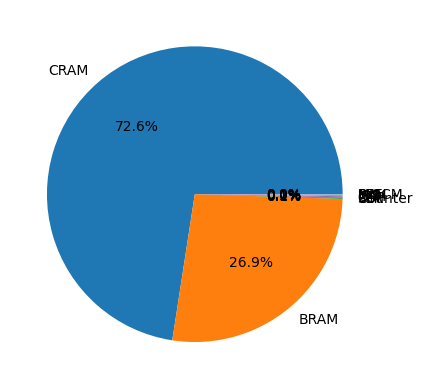

In [4]:
import matplotlib.pyplot as plt

labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_device_day, BRAM_device_day, SLR_device_day, CNT_device_day,DSP_device_day,\
         GTH_device_day,IOB_device_day,PLL_device_day,MMCM_device_day,SEFI_device_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

# Embedded Processors

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/306e7102c922abd010baf5a1a957f9617bd647da/3-Figure2-1.png"
    width="350"
    alt="Proc Tiles">
    <figcaption>Caption Goes Here</figcaption>
</figure>

Example Design Build: [Source](https://github.com/AEW2015/fpga-colab/tree/main/FIG/digilent_arty/dut)

## Design Failures

What is the design?

Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with features not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
      * difficult to simulate for more detailed analysis
* Everything else based on utilization


In [5]:
CRAM_senstivity = .0551
nFIFO_BRAM = .702
SLR_util = .01 #Assume non-zero
CNT_util = .01 #Assume non-zero
DSP_util = .117
GTH_util = 0 # Not used
IOB_util = 2 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [6]:
BRAM_senstivity_estimate = 0.5
CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate
SLR_design_day  = SLR_device_day * SLR_util
CNT_design_day  = CNT_device_day * CNT_util
DSP_design_day  = DSP_device_day * DSP_util
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [7]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} days".format(1/Full_design_day))
nTMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 6.362288481320409 days


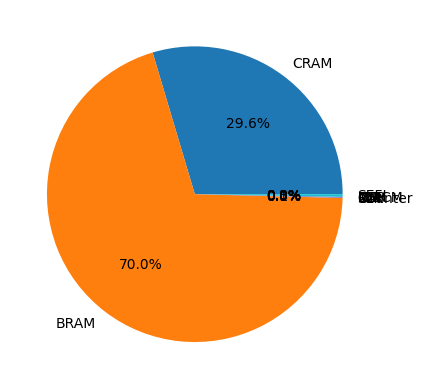

In [8]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Mitigated Design

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/306e7102c922abd010baf5a1a957f9617bd647da/2-Figure1-1.png"
    width="350"
    alt="TMR Application">
    <figcaption>Caption Goes Here</figcaption>
</figure>

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/3-Figure2-1.png"
    width="350"
    alt="TMR Voters">
    <figcaption>Caption Goes Here</figcaption>
</figure>

Example Python TMR Flow: [ipynb](https://github.com/AEW2015/fpga-colab/blob/main/FIG/digilent_arty/tmr/digilent_arty_SpyDrNet_TMR.ipynb)

Example Build TCL script: [TCL](https://github.com/AEW2015/fpga-colab/blob/main/FIG/digilent_arty/tmr/build_tmr.tcl)

Another Python Example: [ipynb](https://github.com/AEW2015/fpga-colab/blob/main/SpyDrNet_TMR_examples.ipynb)

New TMR design!
Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
  * add an additional 0.412% sensitivity for TMR BRAM (see Apendix)
* Everything else based on utilization
  * assume TMR protects SLR, CNT, & DSPs

In [9]:
CRAM_senstivity = .00079
nFIFO_BRAM = .476
SLR_util = .01 #Assume non-zero
CNT_util = .01 #Assume non-zero
DSP_util = .117
GTH_util = 0 # Not used
IOB_util = 2 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [10]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [11]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} Year".format(1/Full_design_day/365.25))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 1.908091985845966 Year


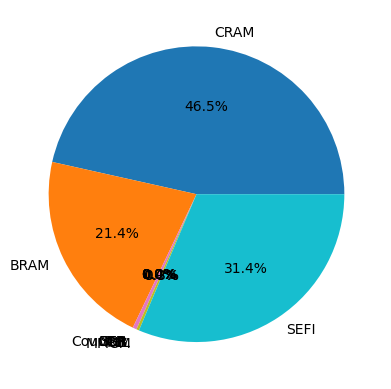

In [12]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Compare to Radiation Data

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/306e7102c922abd010baf5a1a957f9617bd647da/4-Figure3-1.png"
    width="350"
    alt="Rad Testing">
    <figcaption>Caption Goes Here</figcaption>
</figure>

In [13]:
nTMR_NEU_MTTF = 1/ 5.96E-08 # 1/ cross-section
TMR_NEU_MTTF = 1 / 5.58E-10 # 1/ cross-section

In [14]:
GEO_improvement = TMR_GEO_MTTF/nTMR_GEO_MTTF
NEU_improvement = TMR_NEU_MTTF/nTMR_NEU_MTTF
print(GEO_improvement,NEU_improvement)

109.54086723298035 106.8100358422939


In [15]:
nTMR_processor_count = 117
TMR_processor_count = 28
nTMR_norm_perf = 1
TMR_norm_perf = 0.93

nTMR_GEO_MWBF = nTMR_GEO_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_GEO_MWBF = TMR_GEO_MTTF * TMR_processor_count * TMR_norm_perf

nTMR_NEU_MWBF = nTMR_NEU_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_NEU_MWBF = TMR_NEU_MTTF * TMR_processor_count * TMR_norm_perf

GEO_improvement = TMR_GEO_MWBF/nTMR_GEO_MWBF
NEU_improvement = TMR_NEU_MWBF/nTMR_NEU_MWBF
print(GEO_improvement,NEU_improvement)

24.379864809801784 23.772079772079774


### Publication for more info: [IEEE](https://ieeexplore.ieee.org/document/10012379)

# Soft Linux SoC Processor


<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/2-Figure1-1.png"
    width="650"
    alt="VexRiscv LiteX Config">
    <figcaption>Caption Goes Here</figcaption>
</figure>

Example LiteX Gen:

F4PGA LiteX Arty [link](https://github.com/AEW2015/fpga-colab/blob/main/F4PGA_Litex_Arty.ipynb)

Linux on LiteX Repo: [link](https://github.com/litex-hub/linux-on-litex-vexriscv) (supports most dev boards)

## Design Failures

What is the design?

Fault Injection Example:
[ipynb](https://github.com/AEW2015/fpga-colab/blob/main/FIG/digilent_arty/fault_injection/arty_a7_fault_injection.ipynb)

Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
* Everything else based on utilization



In [16]:
CRAM_senstivity = .0057
nFIFO_BRAM = .0692
SLR_util = .01 #Assume non-zero
CNT_util = .01 #Assume non-zero
DSP_util = .0054
GTH_util = 0 # Not used
IOB_util = 64 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [17]:
BRAM_senstivity_estimate = 0.5
CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate
SLR_design_day  = SLR_device_day * SLR_util
CNT_design_day  = CNT_device_day * CNT_util
DSP_design_day  = DSP_device_day * DSP_util
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [18]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} days".format(1/Full_design_day))
nTMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 61.2078058303423 days


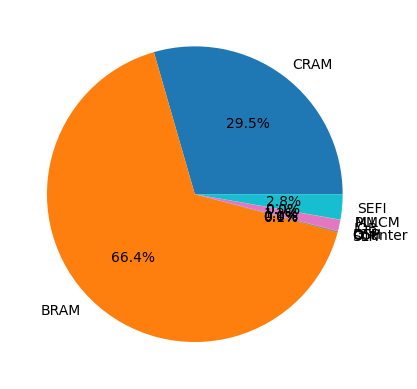

In [19]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Mitigated Design

New TMR design!
Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
  * add an additional 4.12E-3 sensitivity for BRAM (see Apendix)
* Everything else based on utilization
  * assume TMR protects SLR, CNT, & DSPs

In [20]:
CRAM_senstivity = .00039
nFIFO_BRAM = .2076
SLR_util = .03 #Assume non-zero
CNT_util = .03 #Assume non-zero
DSP_util = .0162
GTH_util = 0 # Not used
IOB_util = 64 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [21]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [22]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} Year".format(1/Full_design_day/365.25))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 2.450636114889419 Year


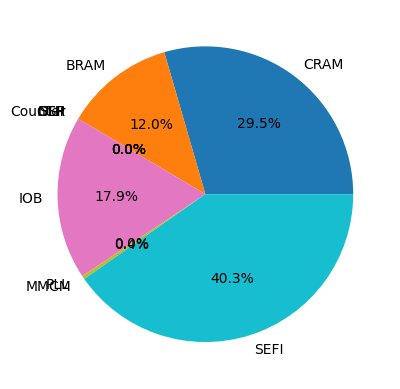

In [23]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Compare to Radiation Data

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/4-Figure5-1.png"
    width="350"
    alt="VexRiscv LiteX Rad Test">
    <figcaption>Caption Goes Here</figcaption>
</figure>

In [24]:
nTMR_NEU_MTTF = 1/ 2.09E-09 # 1/ cross-section
TMR_NEU_MTTF = 1 / 1.42E-10 # 1/ cross-section

In [25]:
GEO_improvement = TMR_GEO_MTTF/nTMR_GEO_MTTF
NEU_improvement = TMR_NEU_MTTF/nTMR_NEU_MTTF
print(GEO_improvement,NEU_improvement)

14.62386747606036 14.71830985915493


In [26]:
nTMR_processor_count = 1
TMR_processor_count = 1
nTMR_norm_perf = 1
TMR_norm_perf = 0.81

nTMR_GEO_MWBF = nTMR_GEO_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_GEO_MWBF = TMR_GEO_MTTF * TMR_processor_count * TMR_norm_perf

nTMR_NEU_MWBF = nTMR_NEU_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_NEU_MWBF = TMR_NEU_MTTF * TMR_processor_count * TMR_norm_perf

GEO_improvement = TMR_GEO_MWBF/nTMR_GEO_MWBF
NEU_improvement = TMR_NEU_MWBF/nTMR_NEU_MWBF
print(GEO_improvement,NEU_improvement)

11.845332655608892 11.921830985915493


### Publication for more info: [IEEE](https://ieeexplore.ieee.org/document/9386126)

# Bitstream Fault Analysis

Small Introduction with pic!

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/6-Figure7-1.png"
    width="450"
    alt="BFAT Flow">
    <figcaption>Caption Goes Here</figcaption>
</figure>

BFAT Examples:

[Embedded Proccessor](https://github.com/AEW2015/fpga-colab/blob/main/FIG/digilent_arty/digilent_arty_BFAT.ipynb)

[Litex Example](https://github.com/AEW2015/fpga-colab/blob/main/BFAT_Litex_example.ipynb)

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/8-Table4-1.png"
    width="450"
    alt="BFAT Flow">
    <figcaption>Caption Goes Here</figcaption>
</figure>

<figure>
    <img src="https://d3i71xaburhd42.cloudfront.net/6f34b7eba74d2e2460e3af1f3edd310d8492b93f/9-Figure11-1.png"
    width="750"
    alt="BFAT Flow">
    <figcaption>Caption Goes Here</figcaption>
</figure>

### Publication for more info: [ACM](https://dl.acm.org/doi/10.1145/3543622.3573191)

# TMR with Placement guides


## Design Failures

What is the design?

Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
* Everything else based on utilization



In [27]:
CRAM_senstivity = .0057
nFIFO_BRAM = .0692
SLR_util = .01 #Assume non-zero
CNT_util = .01 #Assume non-zero
DSP_util = .0054
GTH_util = 0 # Not used
IOB_util = 64 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [28]:
BRAM_senstivity_estimate = 0.5
CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate
SLR_design_day  = SLR_device_day * SLR_util
CNT_design_day  = CNT_device_day * CNT_util
DSP_design_day  = DSP_device_day * DSP_util
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [29]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} days".format(1/Full_design_day))
nTMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 61.2078058303423 days


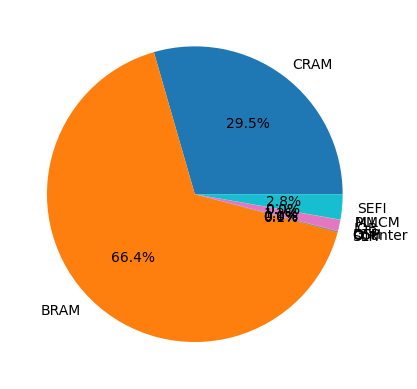

In [30]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Mitigated Design

Need image here...


New TMR design!
Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
  * add an additional 4.12E-3 sensitivity for BRAM (see Apendix)
* Everything else based on utilization
  * assume TMR protects SLR, CNT, & DSPs

In [31]:
CRAM_senstivity = .00013
nFIFO_BRAM = .2076
SLR_util = .03 #Assume non-zero
CNT_util = .03 #Assume non-zero
DSP_util = .0162
GTH_util = 0 # Not used
IOB_util = 64 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [32]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [33]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} Year".format(1/Full_design_day/365.25))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 3.0501286701350017 Year


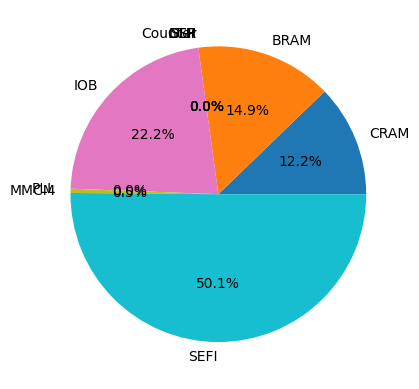

In [34]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Compare to Radiation Data

<figure>
    <img src="https://ccl.byu.edu/images/news_2022/lansce_experiments.jpg"
    width="750"
    alt="VexRiscv LiteX Par Rad Test">
    <figcaption>Caption Goes Here</figcaption>
</figure>

In [35]:
nTMR_NEU_MTTF = 1/ 2.59E-09 # 1/ cross-section
TMR_NEU_MTTF = 1 / 1.14E-10 # 1/ cross-section

In [36]:
GEO_improvement = TMR_GEO_MTTF/nTMR_GEO_MTTF
NEU_improvement = TMR_NEU_MTTF/nTMR_NEU_MTTF
print(GEO_improvement,NEU_improvement)

18.201265045422378 22.719298245614034


In [37]:
nTMR_processor_count = 1
TMR_processor_count = 1
nTMR_norm_perf = 1
TMR_norm_perf = 0.81

nTMR_GEO_MWBF = nTMR_GEO_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_GEO_MWBF = TMR_GEO_MTTF * TMR_processor_count * TMR_norm_perf

nTMR_NEU_MWBF = nTMR_NEU_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_NEU_MWBF = TMR_NEU_MTTF * TMR_processor_count * TMR_norm_perf

GEO_improvement = TMR_GEO_MWBF/nTMR_GEO_MWBF
NEU_improvement = TMR_NEU_MWBF/nTMR_NEU_MWBF
print(GEO_improvement,NEU_improvement)

14.743024686792127 18.40263157894737


# TMR with DDR EDAC


<figure>
    <img src="https://antmicro.com/images/05-09-01-lpddr4-hero.png"
    width="750"
    alt="VexRiscv LiteX Par Rad Test">
    <figcaption>Caption Goes Here</figcaption>
</figure>

## Design Failures

What is the design?

Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
* Everything else based on utilization



In [38]:
CRAM_senstivity = .01274
nFIFO_BRAM = .0692
SLR_util = .01 #Assume non-zero
CNT_util = .01 #Assume non-zero
DSP_util = .0067
GTH_util = 0 # Not used
IOB_util = 138 /620 # UART only
PLL_util = 1 / 24 # Not used
MMCM_util = 0 / 12

In [39]:
BRAM_senstivity_estimate = 0.5
CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate
SLR_design_day  = SLR_device_day * SLR_util
CNT_design_day  = CNT_device_day * CNT_util
DSP_design_day  = DSP_device_day * DSP_util
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [40]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} days".format(1/Full_design_day))
nTMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 44.416831373210684 days


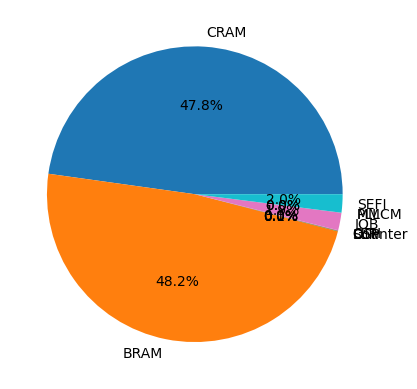

In [41]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Mitigated Design

New TMR design!
Assumptions:
*   CRAM Senstivity reported with random fault injeciton
*   BRAM:
  * Ignore unused BRAMs with feauters not tested
  * Ignore FIFO BRAMs with data in flight
  * Estimated a 50% "senstivity" for operation BRAMs, but could be different
    * difficult to simulate for more detailed analysis
  * add an additional 4.12E-3 sensitivity for BRAM (see Apendix)
* Everything else based on utilization
  * assume TMR protects SLR, CNT, & DSPs

In [42]:
CRAM_senstivity = .00035
nFIFO_BRAM = .2076
SLR_util = .03 #Assume non-zero
CNT_util = .03 #Assume non-zero
DSP_util = .0301
GTH_util = 0 # Not used
IOB_util = 75 /620 # UART only
PLL_util = 1 / 24 # Not used
MMCM_util = 0 / 12

In [43]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [44]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day
print("FPGA will see a design failure every {0} Year".format(1/Full_design_day/365.25))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 2.45402225473117 Year


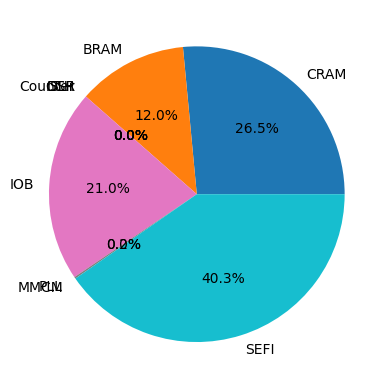

In [45]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Compare to Radiation Data

In [46]:
nTMR_NEU_MTTF = 1/ 3.82E-09 # 1/ cross-section
TMR_NEU_MTTF = 1 / 1.93E-10 # 1/ cross-section

In [47]:
GEO_improvement = TMR_GEO_MTTF/nTMR_GEO_MTTF
NEU_improvement = TMR_NEU_MTTF/nTMR_NEU_MTTF
print(GEO_improvement,NEU_improvement)

20.179999356756642 19.792746113989637


In [48]:
nTMR_processor_count = 1
TMR_processor_count = 1
nTMR_norm_perf = 1
TMR_norm_perf = 0.81

nTMR_GEO_MWBF = nTMR_GEO_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_GEO_MWBF = TMR_GEO_MTTF * TMR_processor_count * TMR_norm_perf

nTMR_NEU_MWBF = nTMR_NEU_MTTF * nTMR_processor_count * nTMR_norm_perf
TMR_NEU_MWBF = TMR_NEU_MTTF * TMR_processor_count * TMR_norm_perf

GEO_improvement = TMR_GEO_MWBF/nTMR_GEO_MWBF
NEU_improvement = TMR_NEU_MWBF/nTMR_NEU_MWBF
print(GEO_improvement,NEU_improvement)

16.345799478972882 16.032124352331607


# Dont forget DDR Failure Rates

<figure>
    <img src="https://www.3d-plus.com/app/uploads/2023/04/3D4D48G48LB2825.png.webp" width="250" alt="3Dplus Memory">
    <figcaption>Caption Goes Here</figcaption>
</figure>

## Placement with SDRAM DDR

In [49]:
CRAM_senstivity = .00013
nFIFO_BRAM = .2076
SLR_util = .03 #Assume non-zero
CNT_util = .03 #Assume non-zero
DSP_util = .0162
GTH_util = 0 # Not used
IOB_util = 64 /620 # UART only
PLL_util = 0 / 24 # Not used
MMCM_util = 1 / 12

In [50]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [51]:
# Example with critical charge
DDR_bit_day = 7.0531E-12
# Same as BRAM for quick estimate
DDR_senstivity_estimate = 0.5
# go for 16GB
DDR_device_day = 1024 * 1024 * 1024 * 16 * DDR_bit_day * DDR_senstivity_estimate

In [52]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day + DDR_device_day
print("FPGA will see a design failure every {0} days".format(1/Full_design_day))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 16.264582918866775 days


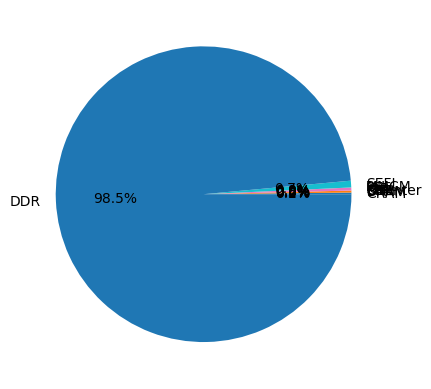

In [53]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI','DDR'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day,DDR_device_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## DDR ECC with SDRAM DDR

In [54]:
CRAM_senstivity = .00035
nFIFO_BRAM = .2076
SLR_util = .03 #Assume non-zero
CNT_util = .03 #Assume non-zero
DSP_util = .0301
GTH_util = 0 # Not used
IOB_util = 75 /620 # UART only
PLL_util = 1 / 24 # Not used
MMCM_util = 0 / 12

In [55]:
BRAM_senstivity_estimate = 0.5
BRAM_TMR_senstivity_estiamte = 0.00411983113735914
TMR_protected = 0

CRAM_design_day = CRAM_device_day * CRAM_senstivity
BRAM_design_day = BRAM_device_day * nFIFO_BRAM * BRAM_senstivity_estimate * BRAM_TMR_senstivity_estiamte
SLR_design_day  = SLR_device_day * SLR_util * TMR_protected
CNT_design_day  = CNT_device_day * CNT_util * TMR_protected
DSP_design_day  = DSP_device_day * DSP_util * TMR_protected
GTH_design_day  = GTH_device_day * GTH_util
IOB_design_day  = IOB_device_day * IOB_util
PLL_design_day  = PLL_device_day * PLL_util
MMCM_design_day = MMCM_device_day * MMCM_util
SEFI_design_day = SEFI_device_day

In [56]:
# Example with critical charge
DDR_bit_day = 7.0531E-12
# Same as BRAM for quick estimate
DDR_senstivity_estimate = 0.5
# Simple ECC estimate (same as BRAM TMR), but probably much better
DDR_ECC_senstivity_estiamte = 0.00411983113735914
# go for 16GB
DDR_device_day = 1024 * 1024 * 1024 * 16 * DDR_bit_day * DDR_senstivity_estimate * DDR_ECC_senstivity_estiamte

In [57]:
Full_design_day = CRAM_design_day + BRAM_design_day + SLR_design_day + CNT_design_day + DSP_design_day \
                + GTH_design_day + IOB_design_day + PLL_design_day + MMCM_design_day + SEFI_design_day + DDR_device_day
print("FPGA will see a design failure every {0} years".format(1/Full_design_day/365.25))
TMR_GEO_MTTF = 1/Full_design_day

FPGA will see a design failure every 2.0053677253668956 years


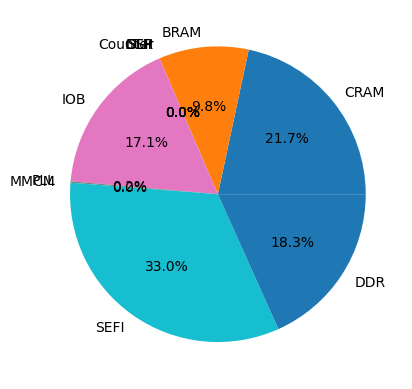

In [58]:
labels = 'CRAM', 'BRAM', 'SLR', 'Counter','DSP','GTH','IOB','PLL','MMCM','SEFI','DDR'
sizes = [CRAM_design_day, BRAM_design_day, SLR_design_day, CNT_design_day,DSP_design_day,\
         GTH_design_day,IOB_design_day,PLL_design_day,MMCM_design_day,SEFI_design_day,DDR_device_day]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## What About MRAM external memory?

There are other options besdies SDRAM DDR that perform much better in space enviroments.



<figure>
    <img src="https://b1967244.smushcdn.com/1967244/wp-content/uploads/consolidation-with-8Gb-v2.png"
    width="750"
    alt="MRAM Memory">
    <figcaption>Caption Goes Here</figcaption>
</figure>